## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing 

### Training Image preprocessing 

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation image preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[183.75 175.75 172.75]
   [177.5  169.5  166.5 ]
   [176.25 168.25 165.25]
   ...
   [165.25 156.25 149.25]
   [166.75 157.75 150.75]
   [163.5  154.5  147.5 ]]

  [[173.75 165.75 162.75]
   [169.   161.   158.  ]
   [166.75 158.75 155.75]
   ...
   [170.5  161.5  154.5 ]
   [175.25 166.25 159.25]
   [173.   164.   157.  ]]

  [[167.25 159.25 156.25]
   [176.75 168.75 165.75]
   [168.   160.   157.  ]
   ...
   [169.25 160.25 153.25]
   [162.75 153.75 146.75]
   [166.25 157.25 150.25]]

  ...

  [[137.5  126.5  122.5 ]
   [141.75 130.75 126.75]
   [148.   137.   133.  ]
   ...
   [144.5  124.5  117.5 ]
   [140.75 120.75 113.75]
   [144.75 124.75 117.75]]

  [[139.5  128.5  124.5 ]
   [133.5  122.5  118.5 ]
   [139.25 128.25 124.25]
   ...
   [149.5  129.5  122.5 ]
   [139.5  119.5  112.5 ]
   [140.75 120.75 113.75]]

  [[133.75 122.75 118.75]
   [138.5  127.5  123.5 ]
   [132.75 121.75 117.75]
   ...
   [145.5  125.5  118.5 ]
   [139.   119.   112.  ]
   [159.5  139.5  13

2024-04-15 18:44:14.925042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [70295]
	 [[{{node Placeholder/_4}}]]
2024-04-15 18:44:14.925590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [70295]
	 [[{{node Placeholder/_4}}]]
2024-04-15 18:44:14.965432: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


## Building Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D, Flatten
from tensorflow.keras.models import Sequential

In [8]:

cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [18]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [19]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - ETA: 0s - loss: 1.3539 - accuracy: 0.5967

2024-04-15 19:12:21.260883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [17572]
	 [[{{node Placeholder/_0}}]]
2024-04-15 19:12:21.261081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]


2197/2197 [==============================] - 1778s 809ms/step - loss: 1.3539 - accuracy: 0.5967 - val_loss: 0.5557 - val_accuracy: 0.8220
Epoch 2/10
2197/2197 [==============================] - 1857s 845ms/step - loss: 0.4435 - accuracy: 0.8582 - val_loss: 0.2990 - val_accuracy: 0.9035
Epoch 3/10
2197/2197 [==============================] - 1764s 803ms/step - loss: 0.2622 - accuracy: 0.9150 - val_loss: 0.2777 - val_accuracy: 0.9153
Epoch 4/10
2197/2197 [==============================] - 2240s 1s/step - loss: 0.1811 - accuracy: 0.9417 - val_loss: 0.2173 - val_accuracy: 0.9311
Epoch 5/10
2197/2197 [==============================] - 1740s 792ms/step - loss: 0.1342 - accuracy: 0.9557 - val_loss: 0.1537 - val_accuracy: 0.9499
Epoch 6/10
2197/2197 [==============================] - 4970s 2s/step - loss: 0.1057 - accuracy: 0.9654 - val_loss: 0.1742 - val_accuracy: 0.9482
Epoch 7/10
2197/2197 [==============================] - 4154s 2s/step - loss: 0.0867 - accuracy: 0.9718 - val_loss: 0.1296 

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 463s 211ms/step - loss: 0.0607 - accuracy: 0.9801
Training accuracy: 0.9801266193389893


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 99s 181ms/step - loss: 0.1750 - accuracy: 0.9501
Validation accuracy: 0.9500910639762878


### Saving Model


In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
training_history.history #Return Dictionary of history

{'loss': [1.3539475202560425,
  0.4435192942619324,
  0.2621607780456543,
  0.18111181259155273,
  0.13424766063690186,
  0.10568565875291824,
  0.0867013931274414,
  0.06968104094266891,
  0.06734240055084229,
  0.05550730228424072],
 'accuracy': [0.5967422723770142,
  0.8581833839416504,
  0.9150152802467346,
  0.9416743516921997,
  0.9556725025177002,
  0.9653744697570801,
  0.9718329906463623,
  0.9777793288230896,
  0.9786044359207153,
  0.9819759726524353],
 'val_loss': [0.5556564927101135,
  0.2989979386329651,
  0.27767542004585266,
  0.2173198163509369,
  0.15368132293224335,
  0.17416232824325562,
  0.1295616775751114,
  0.25924646854400635,
  0.11090461164712906,
  0.1749592274427414],
 'val_accuracy': [0.8219895362854004,
  0.9035397171974182,
  0.9153198003768921,
  0.9311404228210449,
  0.9499203562736511,
  0.9482130408287048,
  0.9609037041664124,
  0.928465723991394,
  0.9654564261436462,
  0.9500910639762878]}

In [26]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

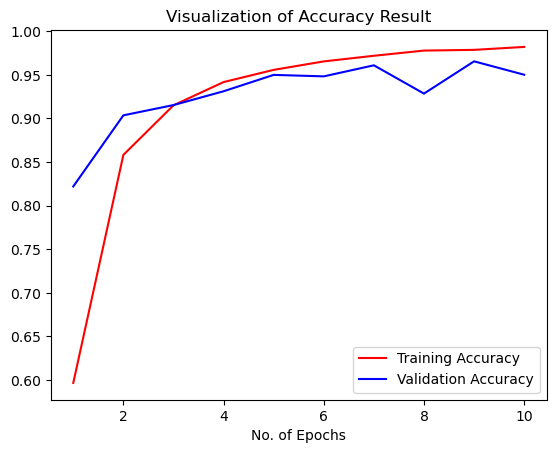

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [29]:
## Some other metrics for model evaluation

In [30]:
class_name = validation_set.class_names

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

2024-04-16 11:12:56.308152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]
2024-04-16 11:12:56.308307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]


17572/17572 [==============================] - 186s 11ms/step


In [33]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [34]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [35]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [37]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.91      0.93       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.93      0.96       440
                                   Apple___healthy       0.83      0.98      0.90       502
                               Blueberry___healthy       0.97      0.94      0.95       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.93      0.96       421
                 Cherry_(including_sour)___healthy       0.95      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.

### Confusion Matrix Visualization


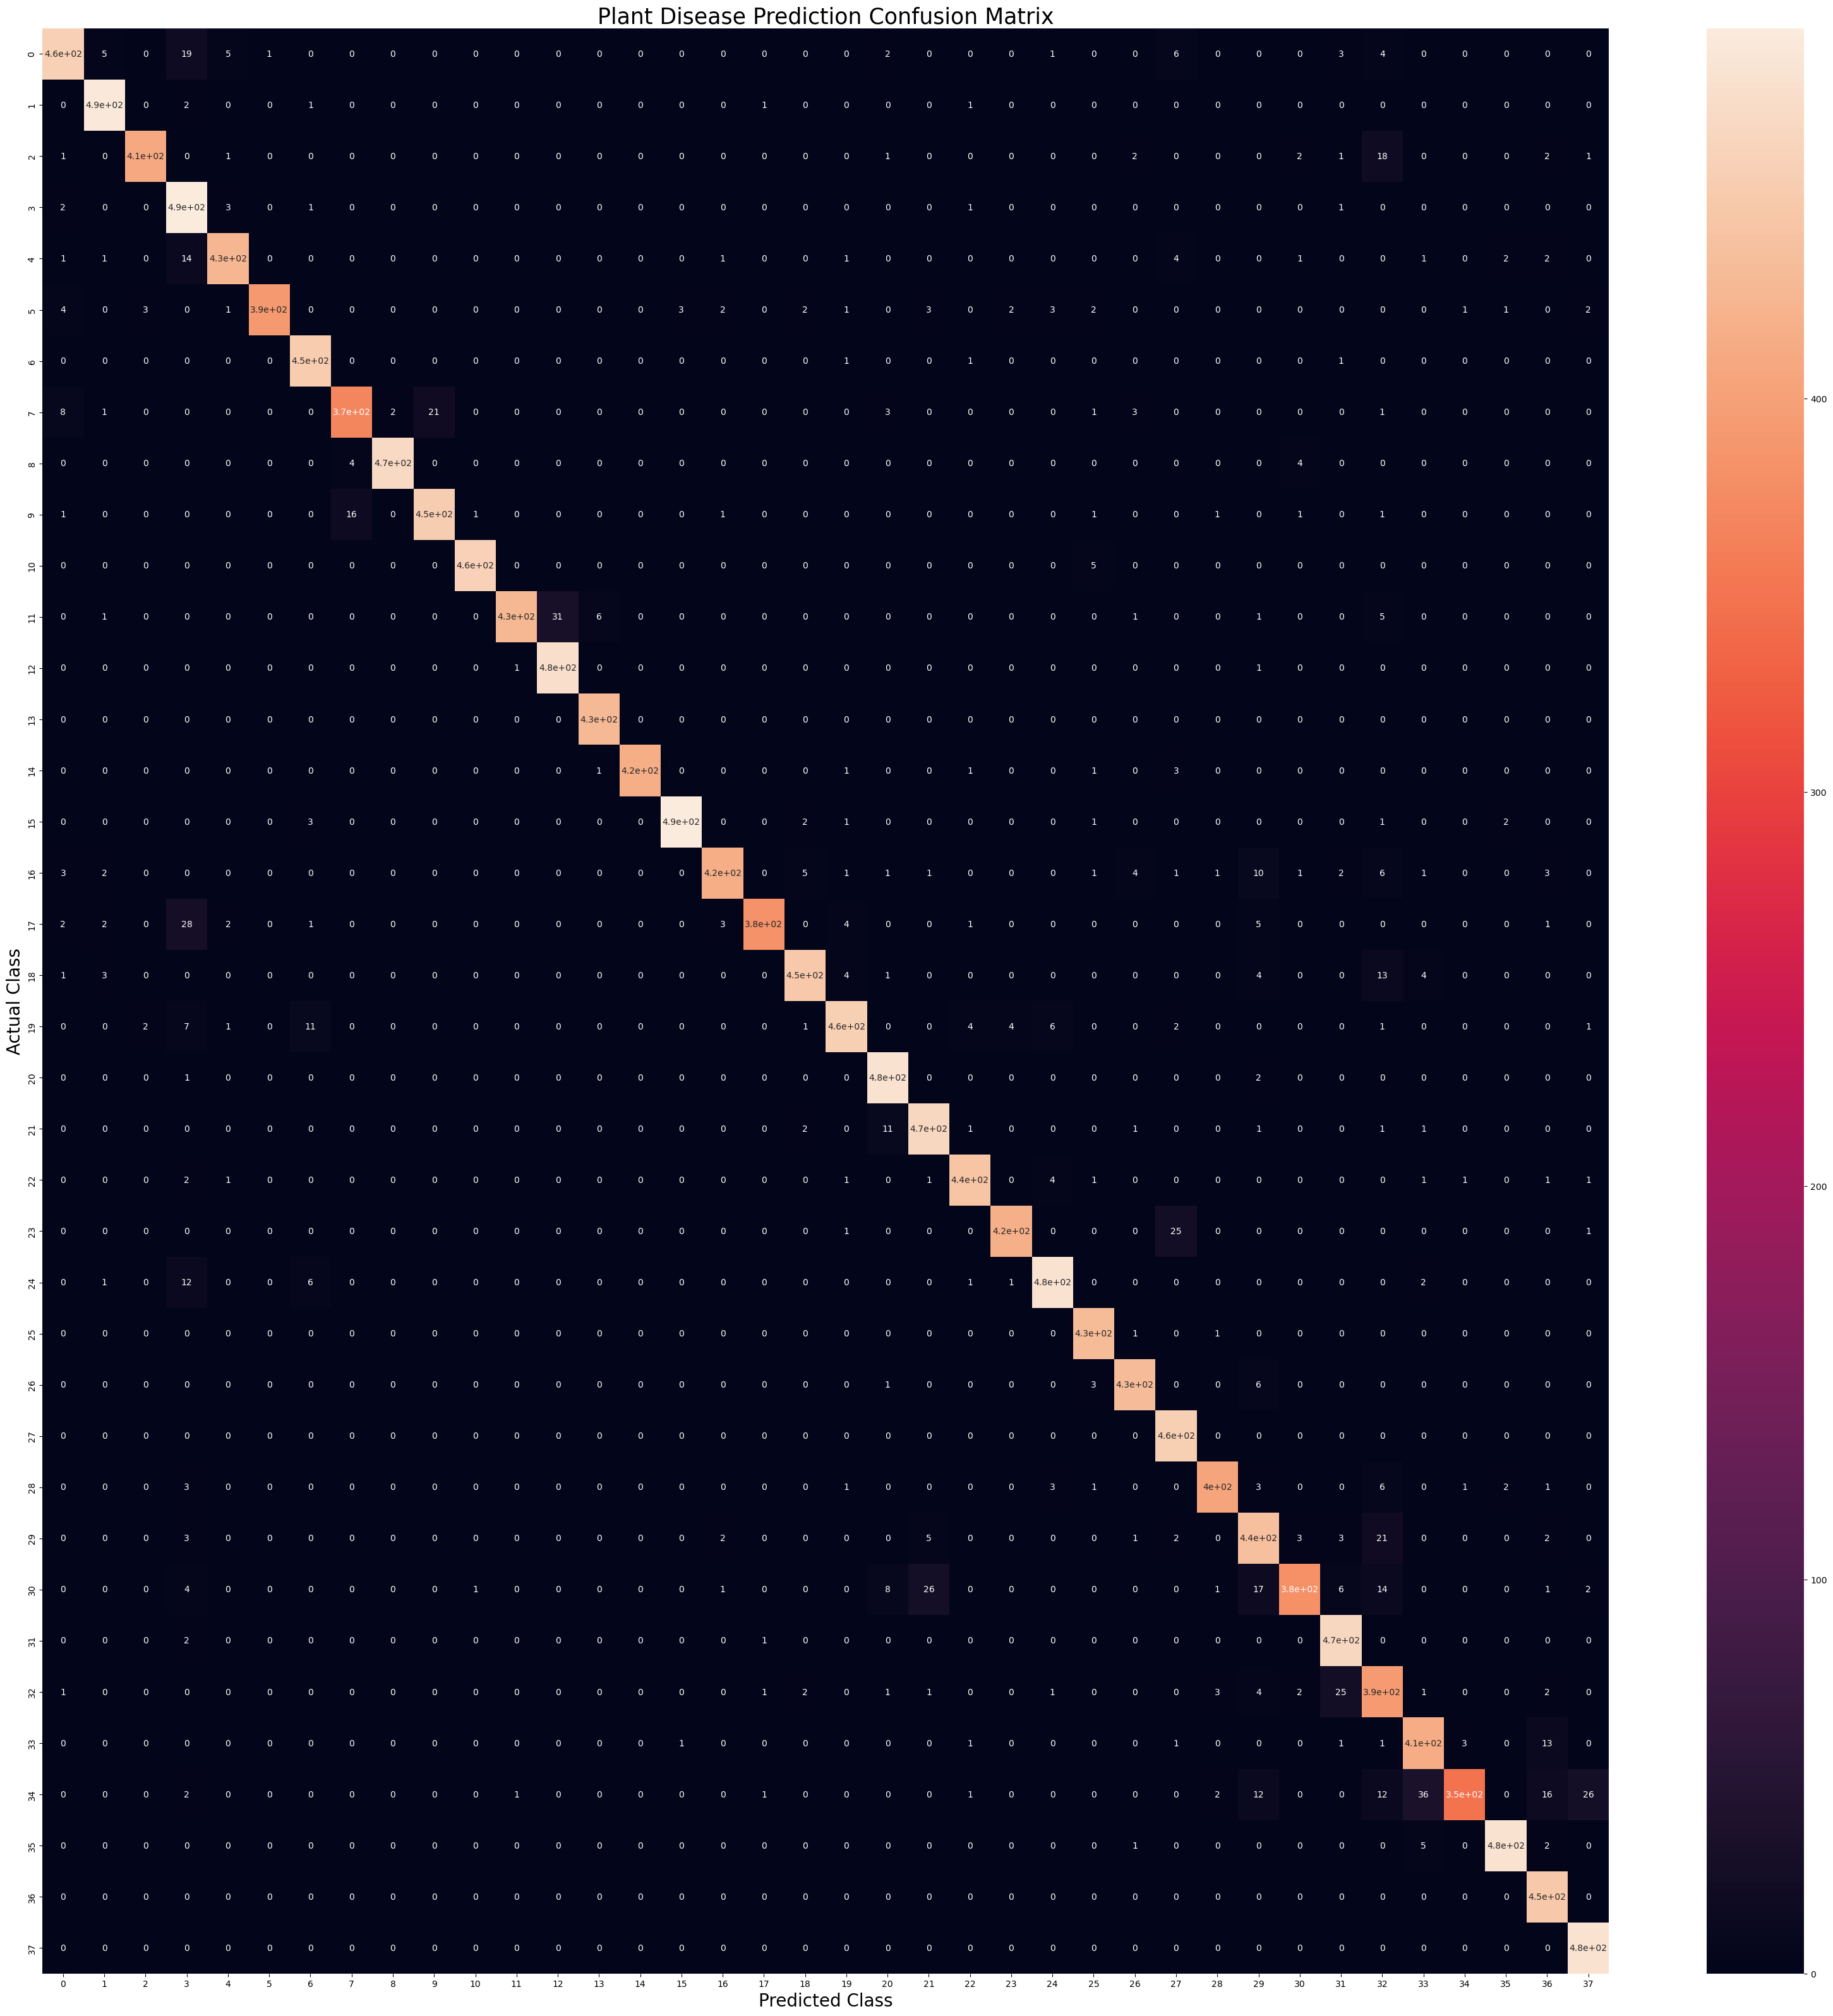

In [38]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()